In [1]:
import matplotlib.pyplot as plt
from keras.datasets import imdb
from keras.utils import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, GRU, Dense, LSTM

In [2]:
max_features = 10000
maxlen = 500

In [3]:
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)

17464789/17464789 [==============================] - 2s 0us/step


In [4]:
input_train = pad_sequences(input_train, maxlen=maxlen)
input_test = pad_sequences(input_test, maxlen=maxlen)

In [5]:
model = Sequential([
    Embedding(max_features, 32),
    LSTM(32),
    Dense(1, activation='sigmoid')
])

In [6]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['acc']
              )

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          320000    
                                                                 
 lstm (LSTM)                 (None, 32)                8320      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 328,353
Trainable params: 328,353
Non-trainable params: 0
_________________________________________________________________


In [8]:
history = model.fit(
    input_train,
    y_train,
    epochs=5,
    batch_size=128,
    validation_split=0.3
    )

Epoch 1/5
137/137 [==============================] - 36s 212ms/step - loss: 0.5360 - acc: 0.7345 - val_loss: 0.3540 - val_acc: 0.8613
Epoch 2/5
137/137 [==============================] - 23s 165ms/step - loss: 0.2744 - acc: 0.8931 - val_loss: 0.3004 - val_acc: 0.8839
Epoch 3/5
137/137 [==============================] - 18s 133ms/step - loss: 0.1904 - acc: 0.9317 - val_loss: 0.2936 - val_acc: 0.8851
Epoch 4/5
137/137 [==============================] - 15s 108ms/step - loss: 0.1375 - acc: 0.9531 - val_loss: 0.3228 - val_acc: 0.8765
Epoch 5/5
137/137 [==============================] - 12s 88ms/step - loss: 0.1113 - acc: 0.9630 - val_loss: 0.3370 - val_acc: 0.8795


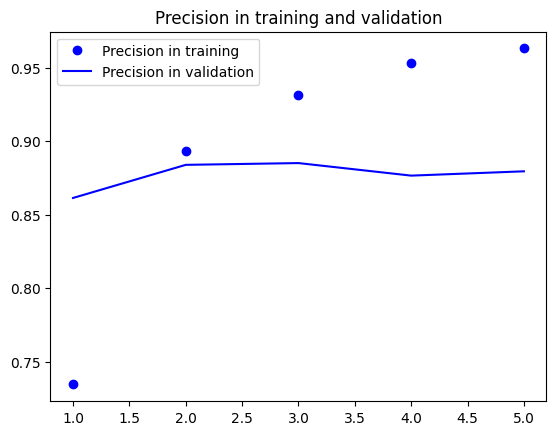

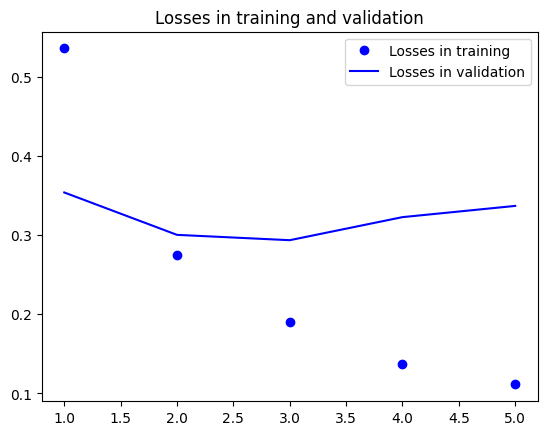

In [9]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Precision in training')
plt.plot(epochs, val_acc, 'b', label='Precision in validation')
plt.title('Precision in training and validation')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Losses in training')
plt.plot(epochs, val_loss, 'b', label='Losses in validation')
plt.title('Losses in training and validation')
plt.legend()

plt.show()

In [10]:
predictions = model.predict(input_test)

binary_predictions = [1 if pred > 0.5 else 0 for pred in predictions]

for i in range(10):
    print(f"Predictable: {binary_predictions[i]}, Actual: {y_test[i]}")

test_loss, test_acc = model.evaluate(input_test, y_test)
print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

782/782 [==============================] - 7s 8ms/step
Predictable: 0, Actual: 0
Predictable: 1, Actual: 1
Predictable: 0, Actual: 1
Predictable: 0, Actual: 0
Predictable: 1, Actual: 1
Predictable: 1, Actual: 1
Predictable: 1, Actual: 1
Predictable: 0, Actual: 0
Predictable: 1, Actual: 0
Predictable: 1, Actual: 1
782/782 [==============================] - 7s 8ms/step - loss: 0.3721 - acc: 0.8638
Test Loss: 0.37213945388793945
Test Accuracy: 0.8637999892234802
